In [18]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [20]:
import piplite
await piplite.install('seaborn')

In [21]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [22]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

In [23]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

In [24]:
await download(filepath, "housing.csv")
file_name="housing.csv"

In [25]:
df = pd.read_csv(file_name)

In [26]:
dtypes = df.dtypes
print("Data Types of Each Column:\n", dtypes)


Data Types of Each Column:
 Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [27]:
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)
print("\nDescriptive Statistics of the Dataset:\n", df.describe())


Descriptive Statistics of the Dataset:
               price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21600.000000  21603.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.372870      2.115736   2079.899736  1.510697e+04   
std    3.671272e+05      0.926657      0.768996    918.440897  4.142051e+04   
min    7.500000e+04      1.000000      0.500000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std       

In [29]:
# Count unique floor values and convert to dataframe
floor_counts = df['floors'].value_counts().to_frame()
print("\nUnique Floor Counts:\n", floor_counts)



Unique Floor Counts:
         count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8


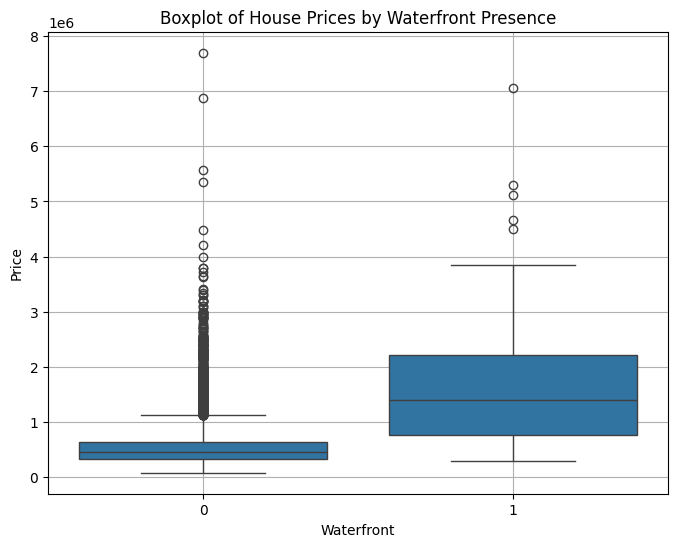

In [30]:
# Boxplot of price vs waterfront
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['waterfront'], y=df['price'])
plt.title("Boxplot of House Prices by Waterfront Presence")
plt.xlabel("Waterfront")
plt.ylabel("Price")
plt.grid(True)
plt.show()

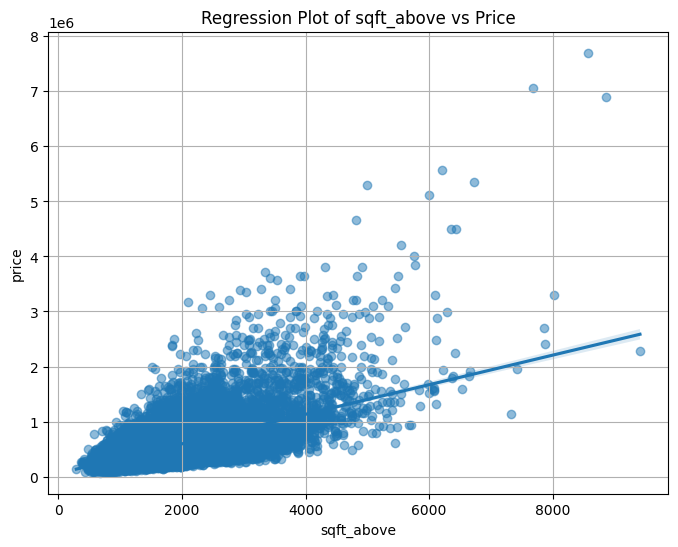

In [31]:
# Regression plot of sqft_above vs price
plt.figure(figsize=(8, 6))
sns.regplot(x=df['sqft_above'], y=df['price'], scatter_kws={'alpha':0.5})
plt.xlabel('sqft_above')
plt.ylabel('price')
plt.title("Regression Plot of sqft_above vs Price")
plt.grid(True)
plt.show()


In [32]:
# Fit linear regression model with sqft_living and calculate R^2
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X, Y)
print("\nR^2 with sqft_living:", lm.score(X, Y))


R^2 with sqft_living: 0.4928532179037931


In [40]:
# Fit linear regression model with multiple features
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features].fillna(0)  # Fill NaN values
Y = df['price']
lm = LinearRegression()
lm.fit(X, Y)
print("\nR^2 with multiple features:", lm.score(X, Y))



R^2 with multiple features: 0.6577143283670792


In [41]:
# Create pipeline for polynomial regression
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression())
])
pipeline.fit(X, Y)
print("\nR^2 with polynomial regression pipeline:", pipeline.score(X, Y))


R^2 with polynomial regression pipeline: 0.7512626805744187


In [42]:
# Create and fit Ridge regression model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scaled, Y_train)
print("\nR^2 with Ridge Regression (alpha=0.1):", ridge.score(X_test_scaled, Y_test))



R^2 with Ridge Regression (alpha=0.1): 0.6480449605086303


In [43]:
# Perform second-order polynomial transformation and fit Ridge regression model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=1)
scaler = StandardScaler()
poly = PolynomialFeatures(degree=2)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

ridge = Ridge(alpha=0.1)
ridge.fit(X_train_poly, Y_train)
print("\nR^2 with Ridge Regression (alpha=0.1) after Polynomial Transform:", ridge.score(X_test_poly, Y_test))


R^2 with Ridge Regression (alpha=0.1) after Polynomial Transform: 0.7119884257435523


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

<class 'ModuleNotFoundError'>: No module named 'folium'